# Clase 8: Archivos, generadores de números aleatorios

En esta clase trataremos un par de temas algo disconexos, antes de empezar a hablar de algoritmos.

## Archivos de texto

Cuando hacemos un cálculo queremos guardar el resultado. Una manera de hacerlo es con archivos de texto.

In [328]:
import os

In [329]:
os.chdir('/Users/jorgenorena/Dropbox/Academic_2020/')

In [330]:
os.listdir()

['Equivalence.synctex.gz',
 'Equivalence.tex',
 '.DS_Store',
 'Equivalence.out',
 'Bubbles_personal',
 'Equivalence_Stochasticity.pdf',
 'Equivalence.pdf',
 'Notes',
 'Burocratic',
 'Teaching',
 'Equivalence.aux',
 'Seminars',
 'Equivalence.log',
 'DE_EFT',
 '.ipynb_checkpoints',
 'Bispectrum_fNL_Like']

In [331]:
os.getcwd()

'/Users/jorgenorena/Dropbox/Academic_2020'

In [332]:
os.chdir('/Users/jorgenorena/Dropbox/Academic_2020/Teaching/NM/Notebooks')

In [336]:
file = open('ejemplo.py', 'r')

In [334]:
for line in file.readlines():
    print(line, end='')

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 15 14:56:57 2020

@author: jorgenorena
"""

def ejemplo1():
    print('Una función')
    
def ejemplo2():
    print('Otra cosa')
    return 1

In [335]:
file.close()

In [30]:
with open('ejemplo.py', 'r') as file:
    lineas = [line for line in file]

with open('copia.py', 'w') as file:
    for l in lineas:
        file.write(l)

In [32]:
with open('copia.py', 'r') as file:
    for l in file:
        print(l, end='')

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 15 14:56:57 2020

@author: jorgenorena
"""

def ejemplo1():
    print('Una función')
    
def ejemplo2():
    print('Otra cosa')
    return 1

## Formato para archivos de texto

Normalmente queremos guardar números bien formateados.

In [33]:
import numpy as np

In [40]:
x = np.linspace(0,1,20)
y = x**2

In [55]:
with open('copia.txt', 'w') as file:
    for i in range(len(x)):
        texto = '%020.3f\t%.3e\n'%(x[i], y[i])
        file.write(texto)

In [57]:
with open('copia.py', 'r') as file:
    x = []
    y = []
    for l in file:
        xin, yin = l.split()
        x.append(float(xin))
        y.append(float(yin))
        print(l, end='')

0000000000000000.000	0.000e+00
0000000000000000.053	2.770e-03
0000000000000000.105	1.108e-02
0000000000000000.158	2.493e-02
0000000000000000.211	4.432e-02
0000000000000000.263	6.925e-02
0000000000000000.316	9.972e-02
0000000000000000.368	1.357e-01
0000000000000000.421	1.773e-01
0000000000000000.474	2.244e-01
0000000000000000.526	2.770e-01
0000000000000000.579	3.352e-01
0000000000000000.632	3.989e-01
0000000000000000.684	4.681e-01
0000000000000000.737	5.429e-01
0000000000000000.789	6.233e-01
0000000000000000.842	7.091e-01
0000000000000000.895	8.006e-01
0000000000000000.947	8.975e-01
0000000000000001.000	1.000e+00


In [59]:
y

[0.0,
 0.00277,
 0.01108,
 0.02493,
 0.04432,
 0.06925,
 0.09972,
 0.1357,
 0.1773,
 0.2244,
 0.277,
 0.3352,
 0.3989,
 0.4681,
 0.5429,
 0.6233,
 0.7091,
 0.8006,
 0.8975,
 1.0]

## HDF5

Tomado de: https://www.geeksforgeeks.org/hdf5-files-in-python/

Una manera más eficiente de guardar grandes cantidades de datos es con archivos binarios. Pero el formato de los archivos queda a discreción del programador. Por eso ha surgido un formato más estándar llamadoo HDF5.

In [64]:
# Primero importamos el módulo
import h5py

# Estos son los datos
x = np.linspace(0,10,30)
y = x**2

# Ahora los grabamos a un archivo
with h5py.File('prueba.hd5', 'w') as file:
    datos1 = file.create_dataset('datos1', data=x)
    datos2 = file.create_dataset('datos2', data=y)

In [66]:
with h5py.File('prueba.hd5', 'r') as file:
    d1 = file['datos1']
    d2 = file['datos2']
    
    print(min(d1))
    print(max(d1[:5]))

0.0
1.3793103448275863


La ventaja de esto es que en realidad las variables d1 y d2 no son arreglos. Son "punteros" a los datos que se encuentran en el disco duro en vez de estar en la RAM. Esto ahorra espacio en RAM.

In [67]:
with h5py.File('prueba.hd5', 'r') as file:
    d1 = file['datos1']
    d2 = file['datos2']
    
    d3 = d2[d1[:] > 1]
    print(d3)

[  1.07015458   1.90249703   2.97265161   4.28061831   5.82639715
   7.60998811   9.6313912   11.89060642  14.38763377  17.12247325
  20.09512485  23.30558859  26.75386445  30.43995244  34.36385256
  38.5255648   42.92508918  47.56242568  52.43757432  57.55053508
  62.90130797  68.48989298  74.31629013  80.38049941  86.68252081
  93.22235434 100.        ]


## Generadores de números aleatorios

Tomado completamente de:

* http://users.dimi.uniud.it/~alberto.policriti/home/sites/default/files/ASD/prng-slides.pdf
* https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node40.html
* https://realpython.com/python-random/

Este es un tema sumamente interesante. Se le dedican libros enteros y es crucial para las simulaciones en física y estadística. Así mismo es una parte central de la criptografía moderna. Sin embargo, yo no soy un experto y este no es el tema central del curso, así que seremos un poco superficiales.

De las siguientes dos secuencias, la segunda parece más aleatoria:

* 0101010101010101010101010101010101010101
* 0010010000111111011010101000100010000101

Esto es porque parece tener menos patrones y repeticiones. En realidad es una representación del número $\pi$.

Se pueden obtener números verdaderamente aleatorios a partir de fenómenos físicos como rayos cósmicos, decaimiento de átomos, o incluso los estados electrónicos de algunos componentes del computador. También se pueden obtener números esencialmente aleatorios contando cuántas teclas ha presionado el usuario junto con el estado de la memoria RAM y el número del proceso en el sistema operativo (todo esto es determinista pero imposible de predecir en la práctica). En Python podemos acceder a tales números "verdaderamente" aleatorios:

In [83]:
import secrets

secrets.randbelow(10)

8

In [85]:
secrets.randbits(64)

777487225593345690

In [86]:
lista = [1,2,3,4,5,6]
secrets.choice(lista)

3

Sin embargo estos números aleatorios son lentos de producir. En física, nos basta con que los números "parezcan" aleatorios. Es decir, que tenga buenas propiedades estadísticas y que no sea predecible.

Por ejemplo, pedimos que la variable aleatoria $x_i \in [0,N]$ esté distribuida de manera uniforme. Es decir, si tomo $n$ muestras, y divido el intervalo $[0,N]$ en $m$ subintervalos, en promedio cada subintervalo contiene $n/m$ muestras.

Definir la ausencia de patrones es más difícil. Podemos pedir que maximice la entropía de Shannon:

$$
H(\{x_i\}) = -\sum_{i} f_i \log_2(f_i)
$$

donde $f_i$ es la frecuencia de cada dato $x_i$. Esta entropía es máxima cuando la distribución es uniforme (todos los $f_i$ son iguales). Por lo tanto podemos pedir que la entropía sea lo más grande posible.

Por otra parte se puede definir la ausencia de patrones como una maximización de la complejidad de Kolmogorov de la secuencia. Esta se define como el programa más corto que puede generar esa secuencia. El problema es que esta es imposible de calcular en general. Una definición más pragmática es que al intentar de comprimir la secuencia, ésta no se reduzca de tamaño en el disco.

A los números que no son aleatorios pero parecen aleatorios se los llama números pseudo-aleatorios. Para generarlos se usan funciones que no tengan patrones fáciles de discernir y que sean caóticas (para condiciones iniciales cercanas producen secuencias muy diferentes).

El punto en la secuencia se llama el "estado". Como el número de bits es finito, el "estado" tarde o temprano se repite. Las secuencias de números aleatorios tienen un período. Queremos que ese período sea lo más largo posible.

Ejemplo sencillo: Generadores de congruencia lineal.

$$
x_{n+1} = (a x_n + c)\mod(m)
$$

In [325]:
# función (muy mala) que implementa el generador de congruencia lineal
def lcg():
    
    # Variables que definen el generador
    a = 7 # intentar todos los números de 2 a 9
    c = 0
    m = 11 # intentar 10 y 11, ojalá grande para dar un período grande
    
    # Esto intenta ejecutar un pedazo de código, y si encuentra un error
    # ejecuta lo que hay luego de "except"
    try:
        # queremos que el estado no se borre cuando la función termine,
        # de esa manera logramos que la función nos de el siguiente valor
        # en la secuencia.
        lcg.xn = (a*lcg.xn + c)%m
    except(AttributeError):
        # Habrá un error cuando lcg.xn no tenga un valor
        print('Error: No se ha fijado la semilla.')
        return
        
    return lcg.xn


In [326]:
lcg.xn = 1

lcg()

7

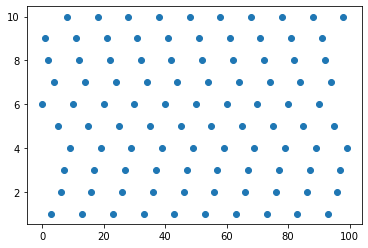

In [327]:
lcg.xn = 4
num = 100
aleatorios = [lcg() for i in range(num)]
plt.scatter(range(num), aleatorios)

In [320]:
# función (mala) que implementa el generador de congruencia lineal
def lcg():
    
    # Variables que definen el generador
    a = 7**5
    c = 0
    m = 2**31 - 1   # si es primo es más fácil obtener períodos grandes
    
    # Esto intenta ejecutar un pedazo de código, y si encuentra un error
    # ejecuta lo que hay luego de "except"
    try:
        # queremos que el estado no se borre cuando la función termine,
        # de esa manera logramos que la función nos de el siguiente valor
        # en la secuencia.
        lcg.xn = (a*lcg.xn + c)%m
    except(AttributeError):
        # Habrá un error cuando lcg.xn no tenga un valor
        print('Error: No se ha fijado la semilla.')
        return
        
    return lcg.xn%10 + 1


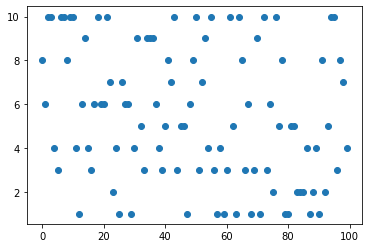

In [323]:
lcg.xn = 321
num = 100
aleatorios = [lcg() for i in range(num)]
plt.scatter(range(num), aleatorios)

Además, cuando se grafican las tuplas $(x_n, x_{n+1},\dots, x_{n + k})$, todos los puntos yacen en $k - 1$ planos. Esto hace predecible la secuencia y no muy aleatoria.

Moraleja: **No programar su propio generador aleatorio**, si hay que hacerlo leer antes un libro dedicado a ello.

Python usa un algoritmo más sofisticado llamado "Marsenne twister". En cambio la librería estándar de C implementa un LCG.

In [216]:
import random

In [217]:
random.randint(1,100)

57

In [220]:
lista = ['a', 'b', 'c', 'd']
random.shuffle(lista)
lista

['d', 'a', 'b', 'c']

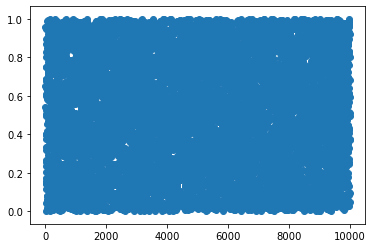

In [311]:
num = 10000
plt.scatter(range(num), np.random.random(num))

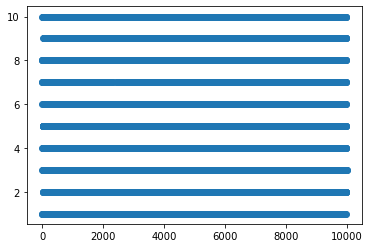

In [319]:
num = 10000
plt.scatter(range(num), np.random.randint(10, size=num) + 1)

## Tareas

### Tarea 4.6

Escriba un código que lea un archivo de texto (.txt conteniendo por ejemplo un cuento breve) y lo guarde en otro archivo de texto pero con todas las palabras en una sola línea.

### Tarea 4.7

Escriba una función dado(n) que simule lanzar un dado de $n$ caras. Corra la función 1000 veces para un dado de 6 caras y guarde los resultados en un archivo .hd5

### Tarea 4.8

Un colega le entrega a usted archivos de texto con los resultados de una simulación (simulacion.txt). Este archivo contiene tres columnas separadas por espacios tal que cada fila es un dato y las tres columnas son tres propiedades simuladas de ese dato. 

Escriba una función que lea ese archivo de texto y lo vuelva a guardar en un archivo simulacion.hd5 con tres datasets correspondientes a las tres propiedades de cada dato.

Como usted quiere reutilizar esta función para cualquier otro archivo con tres columnas, la función debe tomar el nombre del archivo de texto y el nombre deseado para el nuevo archivo hd5 como argumentos.

El archivo simulacion.txt contiene por ejemplo lo siguiente:

### Tarea 4.9

Escriba un código que le asigne tareas a los estudiantes. La lista de 20 estudiantes está en un archivo estudiantes.txt. Hay un nombre de estudiante por línea. Su código debe asignarle a cada estudiante un número entre 1 y 10 que corresponde a la tarea que debe resolver. La distribución de tareas debe ser aleatoria pero cada número debe aparecer exactamente dos veces en la lista.

El código debe producir un archivo con dos columnas llamado "tarea.txt", la primera columna contiene el nombre del estudiante y la segunda columna contiene la tarea asignada.

### Tarea 4.10

Un colega le pasa a usted un archivo .hd5 que contiene tres "datasets" 'x', 'y', 'e'. Todos los datasets tienen la misma longitud y el i-ésimo elemento de cada dataset corresponde a una propiedad diferente del i-ésimo dato.

Escriba una función que grafique esos resultados donde 'x' es el eje horizontal, 'y' el eje vertical y 'e' son las barras de error de 'y'.

CUIDADO: Recuerde que el dataset es un puntero y deja de existir cuando se cierra el archivo.